<a href="https://colab.research.google.com/github/melipass/pcp-datos-cosmologicos/blob/main/share_sesion1_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    

    
# Análisis de datos cosmológicos y el problema de la constante de Hubble usando Python

### Autor: David F. Camarena Torres

# <center> Sesión 1.1 Cosmologia de Fondo: $\Lambda$CDM and Quintaesencia 

# Outline
1. [Introducción: Inferencia Bayesiana y Cosmologia de fondo](#1.-Introducción)
2. [$\Lambda$CDM y quitanesencia from scratch](#2.-LCDM/quintaesencia)
3. [Análisis del modelo $\Lambda$CDM (y $w$CDM) usando supernovas y cronómetros cósmicos](#3.-Analisis)

## 1.-Introducción
### 1.a.-Inferencia Bayesiana:

<img src='https://www.boelstad.net/post/Bayesian_statistics_introduction_files/figure-html/bayes-1.svg'/>

$$ \mathcal{P}(\theta_i|d) = \frac{\mathcal{L}(d|\theta_i)p(\theta_i)}{\mathcal{E}}$$

### 1.b.-Cosmologia de fondo:
 - Metrica de FLRW:
$$ ds^2 = -c^2 dt^2 + a^2(t) \left( \frac{dr^2}{1-kr^2} + r^2 d\Omega^2 \right)$$

 - Ecuacion de Friedmann:
$$3H^2 = 8\pi G \sum_{i} \rho_i + \Lambda  c^2 -  3kc^2 a^{-2}$$

 - Ecuacion de la aceleracion: 
$$3\ddot{a}a^{-1} = 4\pi G \sum_{i} \left( 1 + 3w_i\right)\rho_i + \Lambda c^2$$ 

 - Conserv. de la energia-momentum: 
$$\dot{\rho}_i + 3 H (1+w_i) \rho_i = 0 \phantom{separacion}  p_i/c^2 = w_i $$

     * Radiacion $(w_r = 1/3)$: $\rho_r = \rho_{r0} a^{-4}$
     * Materia (Barionica y CDM) $(w_m = 1)$: $\rho_m = \rho_{m0} a^{-3}$
     * Cons. Cosmo. $(w = -1)$: $\rho_{\Lambda} = $ const.

## 2.-LCDM/quintaesencia

### 2.a.-Modelo estandar: $\Lambda$CDM
 
Usando $\Omega_{i0} = \rho_{i0}/\rho_{c0}$ donde $\rho_{c0} \equiv 3H_0^2/8\pi G$:

$$E(z)^2 \equiv \frac{H(z)}{H_0} = \Omega_{m0} (1+z)^3 + \Omega_{r0} (1+z)^4 + \Omega_{\Lambda 0}$$
 
$$\Omega_r(z) = \frac{\Omega_{r0} (1+z)^{4}}{E^2(z)}\,, \,\, \Omega_m(z) = \frac{\Omega_{m0} (1+z)^{3}}{E^2(z)}\,, \,\, \Omega_{\Lambda}(z) = \frac{\Omega_{\Lambda 0}}{E^2(z)} \,, \,\, \sum_i \Omega_{i}(z) = 1$$
 
$$q(z) \equiv - \frac{\ddot{a}a}{\dot{a}^2} = \frac{1}{2} \left[ \Omega_m(z) + 2 \Omega_r(z) - 2\Omega_{\Lambda}(z) \right]$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = '18'

In [ ]:
# Planck constraints 2018 -- arXiv:1807.06209
OmCDM,OmB,OmR = 0.265, 0.05,5.047e-5 
OmDE = 1 - (OmCDM + OmB + OmR)
H0 = 67.27

In [ ]:
# Parametro de Hubble normalizado E(z) = H(z)/H_0
def Ez_LCDM(z):
    ez = np.sqrt(OmCDM*(1+z)**3 + OmB*(1+z)**3 + OmR*(1+z)**4 + OmDE)
    return ez

Text(0, 0.5, '$H(z)$ [km/s/Mpc]')

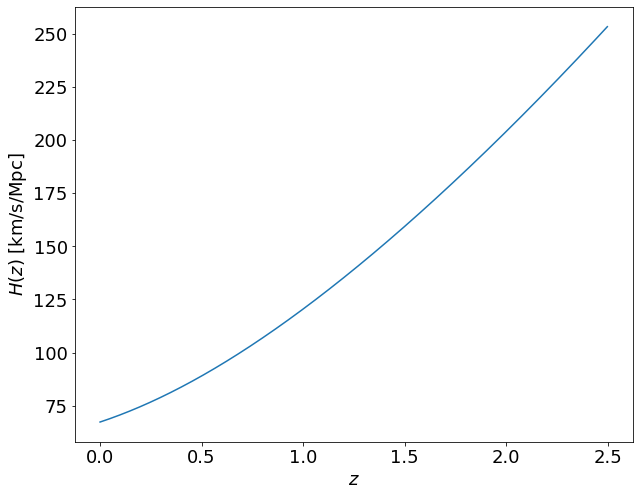

In [ ]:
z_to_plot = np.arange(0.,2.5,0.001)

fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(z_to_plot,H0*Ez_LCDM(z_to_plot))

ax.set_xlabel(r'$z$',fontsize=18)
ax.set_ylabel(r'$H(z)$ [km/s/Mpc]',fontsize=18)

Calcula y grafica $\Omega_i$ como funcion del redshift

In [ ]:
# parametro de desaceleracion
def qz_LCDM(z):
    qz = 0.5*(OmegaMz_LCDM(z) + 2*OmegaRz_LCDM(z) - 2*OmegaDEz_LCDM(z))
    return qz

# parametro de ecuacion de estado efectiva
def weffz_LCDM(z):
    weff = 1/3*OmegaRz_LCDM(z) - OmegaDEz_LCDM(z)
    return weff

In [ ]:
# redshift de transicion de q > 0 ----> q < 0
from scipy import optimize
z_trans = optimize.root_scalar(qz_LCDM,bracket=[0.5,1.5])

Text(0, 0.5, '')

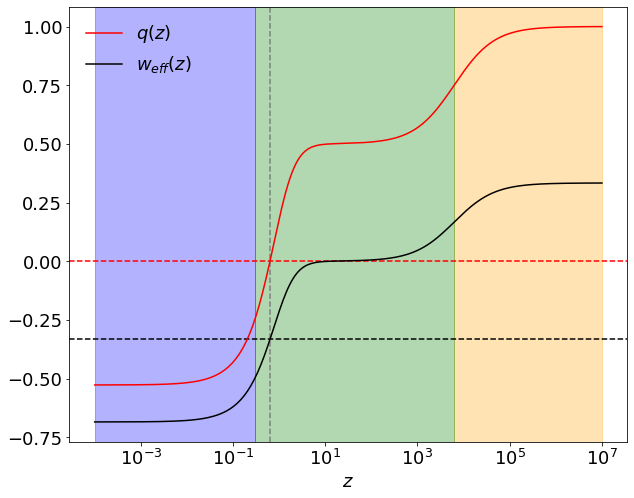

In [ ]:
z_to_plot = np.logspace(-4,7.,300)

fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.axvspan(z_r_m,1e7,color='orange',alpha=0.3)
ax.axvspan(z_m_de,z_r_m,color='green',alpha=0.3)
ax.axvspan(1e-4,z_m_de,color='blue',alpha=0.3)

ax.axhline(0.,color='red',ls='--')
ax.axhline(-1./3.,color='k',ls='--')

ax.axvline(z_trans.root,color='gray',ls='--')

ax.semilogx(z_to_plot,qz_LCDM(z_to_plot),color='red',label=r'$q(z)$')
ax.semilogx(z_to_plot,weffz_LCDM(z_to_plot),label=r'$w_{eff}(z)$',color='k')

ax.legend(loc=0,frameon=False)

ax.set_xlabel(r'$z$',fontsize=18)
ax.set_ylabel(r'',fontsize=18)

Dada la definicion $H = \frac{\dot{a}}{a} = \frac{\dot{z}}{(1+z)}$, podemos calcular la edad del universo
$$t(z) = \int^{+\infty}_{z} \frac{dz}{(1+z)H(z)}$$

In [ ]:
from scipy import integrate

def tz_LCDM(z):
    finte = lambda z: 1/((1+z)*H0*Ez_LCDM(z))
    tz = integrate.quad(finte,z,np.infty)[0] # Aqui [Mpc s/km]
    tz = 1e4*tz/3.24076/3.15 # Transformacion a Gyr
    return tz

tz_LCDM = np.vectorize(tz_LCDM)

Text(0, 0.5, '$t(z)$ [Gyr]')

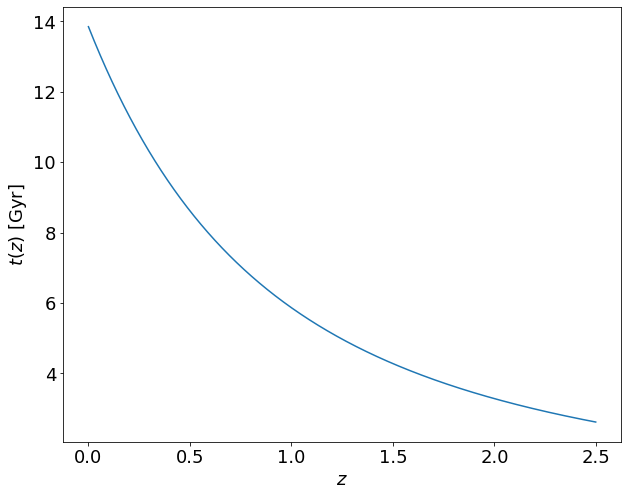

In [ ]:
z_to_plot = np.arange(0.,2.5,0.001)

fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(z_to_plot,tz_LCDM(z_to_plot))

ax.set_xlabel(r'$z$',fontsize=18)
ax.set_ylabel(r'$t(z)$ [Gyr]',fontsize=18)

Distancias cosmologicas

$$d_C = \frac{c}{H_0} \int_0^z \frac{dz'}{E(z')}$$

$$d_L = (1+z) d_C(z)$$

$$d_A = \frac{d_C(z)}{(1+z)}$$

In [ ]:
from scipy import constants

# velocidad de la luz en el vacion en km/s
cc = constants.c*1e-3

### 2.b.-Energia oscura dinamica: quintaesencia

Campo escalar como candidato a la energia oscura:

$$S = \int \left( \frac{R^2}{2 \kappa^2} + \mathcal{L}_{\phi} \right) \sqrt{-g} d^4x + S_M$$ 

$$\mathcal{L}_{\phi} = -\frac{1}{2} g^{\mu \nu} \partial_\mu \phi \partial_\nu \phi - V(\phi)$$
 
Variacion de la accion S respecto a $\phi$:

$$\ddot{\phi}+3H\dot{\phi}+\frac{dV}{d\phi} =0$$ 

Adicionalmente, del tensor energia momento podemos definir 

$$p = \dot{\phi}^2/2 - V(\phi) \,, \,\,  \rho = \dot{\phi}^2/2 + V(\phi)  \,, \,\,  w_{\phi} = \frac{\dot{\phi}^2 - 2V(\phi)}{\dot{\phi}^2 + 2V(\phi)}$$

Ecuaciones dinamicas pueden ser re-escritas:

$$\frac{dx_1}{dN} = -3x_1 + \frac{\sqrt{6}}{2} \lambda x_2^2 + \frac{1}{2} x_1 \left( 3 + 3x_1^2 -3x_2^2 + x_3^2\right)$$

$$\frac{dx_2}{dN} = -\frac{\sqrt{6}}{2} \lambda x_1 x_2 + \frac{1}{2} x_2 \left( 3 + 3x_1^2 -3x_2^2 + x_3^2\right)$$

$$\frac{dx_3}{dN} = -2x_3 + \frac{1}{2} x_3 \left( 3 + 3x_1^2 -3x_2^2 + x_3^2\right)$$

$$\frac{d\lambda}{dN} = - \sqrt{6} \lambda^2 (\Gamma -1) x_1$$

$$x_1^2 = \frac{\kappa^2 \dot{\phi}^2}{6H^2} \,, \,\, x_2^2 = \frac{\kappa^2 V}{3H^2} \,, \,\, x_r^2 = \Omega_r  \,, \,\, N = \ln(a) \,, \,\, \Gamma = \frac{VV_{,\phi \phi}}{V^2_{,\phi}}$$

Dark Energy: Theory and Observations, Luca Amendola, Shiji Tsujikawa [Dark energy book](https://www.cambridge.org/br/academic/subjects/physics/cosmology-relativity-and-gravitation/dark-energy-theory-and-observations?format=HB&isbn=9780521516006)

Dynamics of dark energy, Edmund J. Copeland, M. Sami, Shinji Tsujikawa [hep-th/0603057](https://arxiv.org/abs/hep-th/0603057)

In [ ]:
from scipy.integrate import odeint

# sistema de ecuacione dinamicas para un potencial V(\phi) = M^5 \phi
def sis_quintaesencia(vec_x,N):
    x1, x2, xr, alpha = vec_x
    dx1dN = 0.5*x1*(3*x1**2 - 3*x2**2 + xr**2 + 3) + 0.5*np.sqrt(6)*alpha*x2**2 - 3*x1
    dx2dN = 0.5*x2*(3*x1**2 - 3*x2**2 + xr**2 + 3) - 0.5*np.sqrt(6)*alpha*x1*x2
    dxrdN = 0.5*xr*(3*x1**2 - 3*x2**2 + xr**2 +3) - 2*xr
    dalphadN = -np.sqrt(6)*alpha**2*x1
    dxsdN = np.array([dx1dN,dx2dN,dxrdN,dalphadN])
    return dxsdN

In [ ]:
N_ini = -16.4
N_tab = np.linspace(N_ini,0.,250)
ini_cond = np.array([4.5e-5,2e-8,0.99976,1e9])

In [ ]:
sol = integrate.odeint(sis_quintaesencia,ini_cond,N_tab)

OmegaDE_qui = sol[:,0]**2 + sol[:,1]**2
OmegaR_qui = sol[:,2]**2
OmegaM_qui = 1 - OmegaDE_qui - OmegaR_qui
alpha_qui = sol[:,3]

wDE_qui = (sol[:,0]**2 - sol[:,1]**2)/(sol[:,0]**2 + sol[:,1]**2)

z_tab = 1/np.exp(N_tab) -1

In [ ]:
from scipy import interpolate

OmegaDEz_qui = interpolate.interp1d(z_tab,OmegaDE_qui,kind='cubic',)
OmegaRz_qui = interpolate.interp1d(z_tab,OmegaR_qui,kind='cubic')
OmegaMz_qui = interpolate.interp1d(z_tab,OmegaM_qui,kind='cubic')

In [ ]:
print(r'$\Lambda$CDM: %.3g,%.2g,%.2g'%(OmegaRz_LCDM(0),OmegaMz_LCDM(0),OmegaDEz_LCDM(0)))
print(r'Quintaesencia: %.3g,%.2g,%.2g'%(OmegaRz_qui(0),OmegaMz_qui(0),OmegaDEz_qui(0)))

$\Lambda$CDM: 5.05e-05,0.32,0.68
Quintaesencia: 5.07e-05,0.32,0.68


Calcula y grafica $E(z)$ y $H(z)$


In [ ]:
def qz_qui(z):
    qz = 0.5*(OmegaMz_qui(z) + 2*OmegaRz_qui(z) - 2*OmegaDEz_qui(z))
    return qz

def weffz_qui(z):
    weff = 1/3*OmegaRz_qui(z) - OmegaDEz_qui(z)
    return weff

Text(0, 0.5, '')

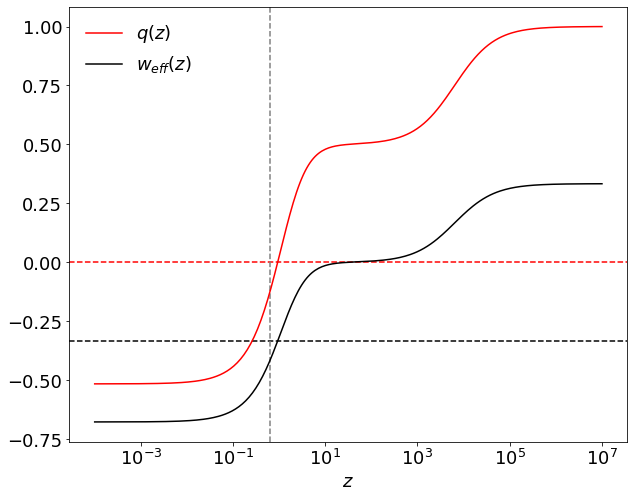

In [ ]:
z_to_plot = np.logspace(-4,7.,300)

fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.axhline(0.,color='red',ls='--')
ax.axhline(-1./3.,color='k',ls='--')

ax.axvline(z_trans.root,color='gray',ls='--')

ax.semilogx(z_to_plot,qz_qui(z_to_plot),color='red',label=r'$q(z)$')
ax.semilogx(z_to_plot,weffz_qui(z_to_plot),label=r'$w_{eff}(z)$',color='k')

ax.legend(loc=0,frameon=False)

ax.set_xlabel(r'$z$',fontsize=18)
ax.set_ylabel(r'',fontsize=18)

A que redshift el universo empieza acelerar segun este modelo de Quintaesencia?

Calcula la edad del universo usando este modelo de Quintaesencia y comparalo con el valor obtenido para el modelo $\Lambda$CDM

Compara las distancias cosmologicas del modelo de Quintaesencia con las distancias de $\Lambda$CDM



## 3.-Analisis

### 3.a.-CLASS: Cosmic Linear Anisotropy Solving System 

'Calculadora' cosmologica ([link](https://github.com/lesgourg/class_public)) para el modelo $\Lambda$CDM y algunas extensiones, por ejemplo $w$CDM. Codigo fuente en C++ wrapped en python: classy.

In [ ]:
! pip install classy
from classy import Class

     |████████████████████████████████| 645kB 7.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for classy: filename=classy-2.9.4.0-cp37-cp37m-linux_x86_64.whl size=1819897 sha256=8581ed2c3e33f3d7e861e9efc82620701def82003c603307882e351ac47ae435
  Stored in directory: /root/.cache/pip/wheels/24/7f/44/37bf2c66a149d5fc3fabe8215321ee98a5e11553edfe22893a
Successfully built classy


#### $\Lambda$CDM from CLASS

In [ ]:
LCDM_arguments = {'h': H0/100, 'Omega_cdm': OmCDM, 'Omega_b': OmB}
LCDM = Class()
LCDM.set(LCDM_arguments)
LCDM.compute()

In [ ]:
Hz_class = lambda z: cc*LCDM.Hubble(z)
Hz_class = np.vectorize(Hz_class)

Text(0, 0.5, '$H(z)$ [km/s/Mpc]')

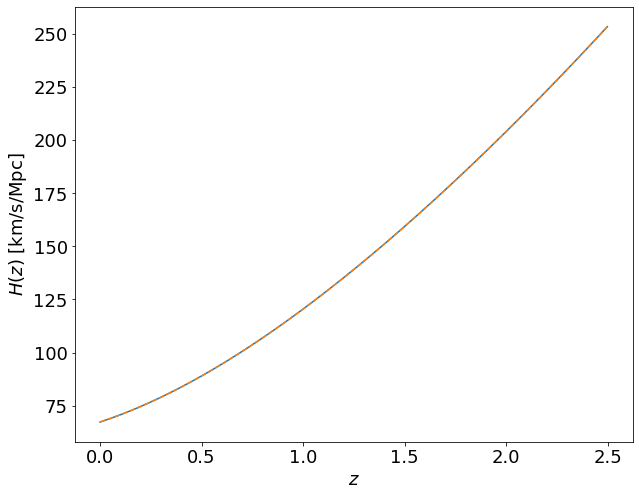

In [ ]:
z_to_plot = np.arange(0.,2.5,0.001)

fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(z_to_plot,Hz_class(z_to_plot))
ax.plot(z_to_plot,H0*Ez_LCDM(z_to_plot),'--')

ax.set_xlabel(r'$z$',fontsize=18)
ax.set_ylabel(r'$H(z)$ [km/s/Mpc]',fontsize=18)

Usa la funcion para LCDM.get_background() para graficar $\Omega_i$ como funcion del redshift

#### $w$CDM from CLASS

Modelo fenomenologico que imita una componente de energia escura dinamica. En este caso usamos la aproximacion CLP:
$$w_{fld}(a) = w_0 + w_a (1-a)$$

In [ ]:
wCDM_arguments = {'h': H0/100, 'Omega_cdm': OmCDM, 'Omega_b': OmB,'Omega_fld':LCDM.Omega_Lambda(),'fluid_equation_of_state':'CLP','w0_fld':-0.95,
                  'wa_fld':0.75}
wCDM = Class()
wCDM.set(wCDM_arguments)
wCDM.compute()

In [ ]:
Hz_wCDM = lambda z: cc*wCDM.Hubble(z)
Hz_wCDM = np.vectorize(Hz_wCDM)

Text(0, 0.5, '$H(z)$ [km/s/Mpc]')

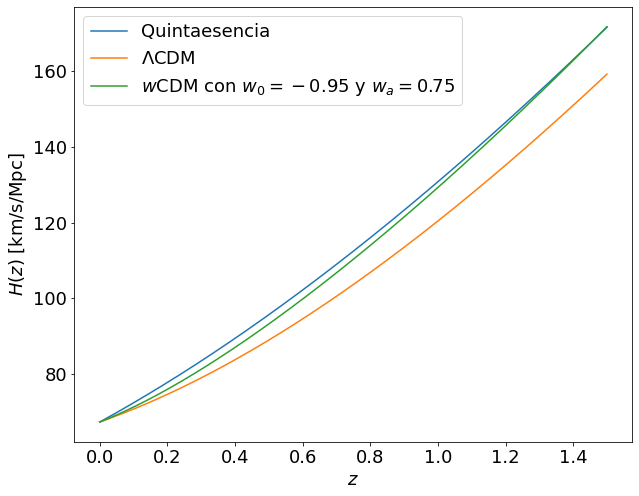

In [ ]:
z_to_plot = np.arange(0.,1.5,0.001)

fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(z_to_plot,H0*Ez_qui(z_to_plot),label='Quintaesencia')
ax.plot(z_to_plot,H0*Ez_LCDM(z_to_plot),label=r'$\Lambda$CDM')
ax.plot(z_to_plot,Hz_wCDM(z_to_plot),label=r'$w$CDM con $w_0 = -0.95$ y $w_a = 0.75$')

ax.legend(loc=0)
ax.set_xlabel(r'$z$',fontsize=18)
ax.set_ylabel(r'$H(z)$ [km/s/Mpc]',fontsize=18)

Grafica $\Omega_{DE}(z)$ de los modelos $\Lambda$CDM, $w$CDM y Quintaesencia. 

### Descargando Data sets

In [ ]:
! pip install gdown
import os 
if not 'datos_sesion1-2.tar.gz' in os.listdir():
  ! gdown --id 1nQPXC3id4JhqtSD1gLQf1ocBk7gvf81I --output datos_sesion1-2.tar.gz
  ! tar -xvf datos_sesion1-2.tar.gz

#### Cosmic chronometers

De pares de galaxia con evolucion pasiva ([astro-
ph/0106145](https://arxiv.org/abs/astro-ph/0106145)):
$$\frac{dt}{dz} \propto H(z)$$ 

Datos provenientes de [arXiv:1601.01701](https://arxiv.org/abs/1601.01701)

In [ ]:
cc_datos = np.loadtxt('datos_sesion1-1/cosmic_clocks/Hz_2016.dat')

z_hz = cc_datos[:, 0]
Hz = cc_datos[:, 1]
err_hz = cc_datos[:, 2]

print('zmin, zmax: %.4f, %.4f'%(np.min(z_hz),np.max(z_hz)))

zmin, zmax: 0.0700, 1.9650


Grafica H(z) de $\Lambda$CDM y $w$CDM junto con los datos.

Text(0, 0.5, '$H(z)$ [km/s/Mpc]')

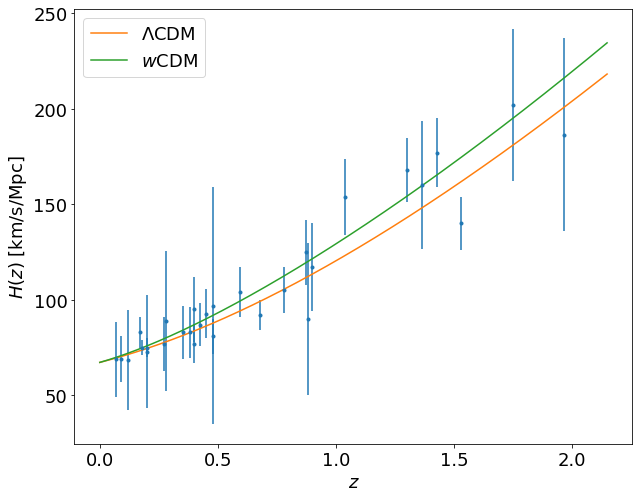

In [ ]:
z_to_plot = np.arange(0.,2.15,0.001)

fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.errorbar(z_hz,Hz,err_hz,ls=' ',marker='.')

ax.legend(loc=0)
ax.set_xlabel(r'$z$',fontsize=18)
ax.set_ylabel(r'$H(z)$ [km/s/Mpc]',fontsize=18)

#### Supernovas

"Candela estándar":
$$m_B(z) = 5\log_{10}\frac{d_L(z)}{\rm 1 Mpc}+25 + M_B$$

Datos provenientes de [arXiv:1710.00845](https://arxiv.org/abs/1710.00845)

In [ ]:
import pandas

sne_datos = pandas.read_table('datos_sesion1-1/Pantheon/lcparam_full_long.txt',sep=' ')

cov_sne = pandas.read_table('datos_sesion1-1/Pantheon/sys_full_long.dat')
cov_sne = np.array(cov_sne).reshape((1048, 1048))

sne_datos.head()

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor,Unnamed: 19
0,03D1au,0.50309,0.50309,0.0,22.93445,0.12605,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,03D1ax,0.49480,0.49480,0.0,22.88020,0.11765,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,03D1co,0.67767,0.67767,0.0,24.03770,0.20560,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,03D1ew,0.86650,0.86650,0.0,24.34685,0.17385,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,03D1fq,0.79857,0.79857,0.0,24.36050,0.17435,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
z_sne = sne_datos['zcmb']
mb_sne = sne_datos['mb']
dmb_sne = sne_datos['dmb']

cov_sne_tot = cov_sne + np.diag(sne_datos['dmb'])**2

print('zmin, zmax: %.4f, %.4f'%(np.min(z_sne),np.max(z_sne)))

zmin, zmax: 0.0101, 2.2600


In [ ]:
MB = -19.4

mB_LCDM = lambda z: 5*np.log10(LCDM.luminosity_distance(z)) + 25 + MB
mB_wCDM = lambda z: 5*np.log10(wCDM.luminosity_distance(z)) + 25 + MB

mB_LCDM = np.vectorize(mB_LCDM)
mB_wCDM = np.vectorize(mB_wCDM)

Text(0, 0.5, '$m_B$')

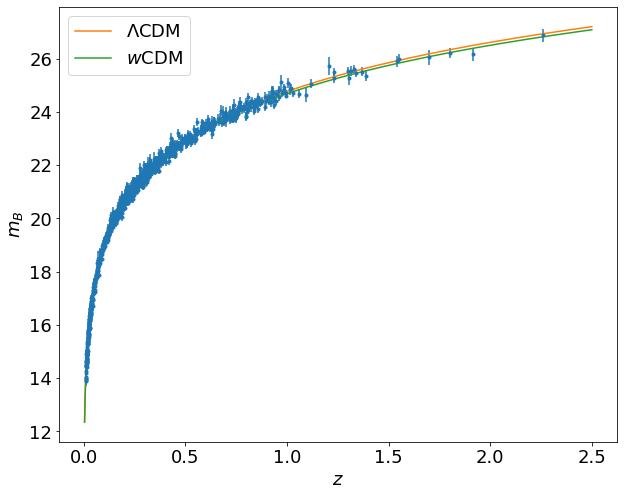

In [ ]:
z_to_plot = np.arange(5e-3,2.5,0.001)

fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.errorbar(z_sne,mb_sne,dmb_sne,ls=' ',marker='.')
ax.plot(z_to_plot,mB_LCDM(z_to_plot),label=r'$\Lambda$CDM')
ax.plot(z_to_plot,mB_wCDM(z_to_plot),label=r'$w$CDM')

ax.legend(loc=0)
ax.set_xlabel(r'$z$',fontsize=18)
ax.set_ylabel(r'$m_B$',fontsize=18)

Que modelo se ajusta mejor a los datos?

$$\chi^2 = \frac{(\rm observacion - prediccion\, teoria)^2}{\rm error\, observado^2}$$

Cronometros cosmicos:

$$\chi_{cc}^2 = \sum_i \frac{\left[H_i - H^{\rm teo}(z_i)\right]^2}{\sigma_{H,i}}$$

Supernovas:

$$\chi_{sne}^2 = \left[m_{B,i} - m_B^{\rm teo}(z_i)\right] \mathcal{C}^{-1}_{ij} \left[m_{B,j} - m_B^{\rm teo}(z_j)\right] $$

Calcula $\chi^2_{sne}$ y $\chi^2_{cc}$ para los modelos $\Lambda$CDM y $w$CDM


#### El valor de mejor ajuste a los datos

 - Best-fit para $\Lambda$CDM fijando $\Omega_b = 0.05$ y usando dos parametros libres ($H_0$ y $\Omega_{cdm}$)
 - Best-fit para $w$CDM fijando $\Omega_b = 0.05$ y usando cuatros parametros libres ($H_0$, $\Omega_{cdm}$, $w_0$, $w_a$) y considerando un prior gaussiano sobre $w_0 = \mathcal{N}(\mu = -0.92, \sigma= 0.1)$

In [ ]:
del H0,OmCDM,OmB

Funcion LCDM_cosmology

In [ ]:
def LCDM_cosmology(theta_vec):
    H0, OmCDM = theta_vec
    OmB = 0.05
    
    cosmo_arguments = {'h': H0/100, 'Omega_cdm': OmCDM, 'Omega_b': OmB}
    cosmo = Class()
    cosmo.set(cosmo_arguments)
    cosmo.compute()
    
    MB = -19.4
    mB = lambda z: 5*np.log10(cosmo.luminosity_distance(z)) + 25 + MB
    Hz = lambda z: cc*cosmo.Hubble(z)
    
    mB_tab = [mB(zs) for zs in z_sne]
    Hz_tab = [Hz(zh) for zh in z_hz]
    
    cosmo.struct_cleanup()
    cosmo.empty()
    
    return np.array(mB_tab), np.array(Hz_tab)

Funcion wCDM_cosmology



In [ ]:
def chi2_hz(theta_vec,cosmo):
    if cosmo == 'LCDM':
        Hz_theo = LCDM_cosmology(theta_vec)[1]
    else:
        Hz_theo = wCDM_cosmology(theta_vec)[1]
    chi2hz = np.sum((Hz - Hz_theo)**2/err_hz**2)
    return chi2hz

In [ ]:
def chi2_sn(theta_vec,cosmo):
    if cosmo == 'LCDM':
        mB_theo = LCDM_cosmology(theta_vec)[0]
    else:
        mB_theo = wCDM_cosmology(theta_vec)[0]
    diff = mb_sne - mB_theo
    chi2sn = np.dot(np.dot(diff,inv_cov_sne),diff)
    return chi2sn

In [ ]:
def prior_w0(theta_vec):
    H0, OmCDM,w0,wa = theta_vec
    pw = (-0.92 - w0)**2/0.1**2
    return pw

In [ ]:
chi2_tot_LCDM = lambda theta_vec: chi2_hz(theta_vec,'LCDM') + chi2_sn(theta_vec,'LCDM')
chi2_tot_wCDM = lambda theta_vec: chi2_hz(theta_vec,'wCDM') + chi2_sn(theta_vec,'wCDM') + prior_w0(theta_vec)

In [ ]:
from scipy.optimize import minimize, fmin
results_LCDM = minimize(chi2_tot_LCDM, x0=[70.0,0.25], bounds=((55,85),(0.2,0.3)))
results_wCDM = minimize(chi2_tot_wCDM, x0=[70.0,0.25,-1.,-0.1], bounds=((55,85),(0.2,0.3),(-1.5,-0.55),(-1.,1.0)))

In [ ]:
results_LCDM

      fun: 1041.6182751041147
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00011369, -0.01023182])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 27
      nit: 6
   status: 0
  success: True
        x: array([68.32146017,  0.25362072])

In [ ]:
results_wCDM

      fun: 1041.7457743267314
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00081855, -0.02112301, -0.01077751,  0.32421212])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 190
      nit: 31
   status: 0
  success: True
        x: array([68.13789619,  0.29280171, -0.96397966, -1.        ])

Grafica el best-fit de $\Lambda$CDM y $w$CDM con los datos



### Aplicacion del teorema de Bayes

$$ \mathcal{P}(\theta_i|d) = \frac{\mathcal{L}(d|\theta_i)p(\theta_i)}{\mathcal{E}}$$

Asumamos la Likelihood:
$$\mathcal{L} \propto \exp - \frac{1}{2} \chi^2 $$

Calcula $-\log \mathcal{P}$ para $\Lambda$CDM dentro el espacio de parametros $H_0 = [55,85]$ y $\Omega_{cdm} = [0.2,0.3]$